# Import necessary libraries

In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [106]:
df = pd.read_csv('titanic.csv')

# Data Preprocessing
# Fill missing age values with the median age

In [107]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing embarked values with the mode

In [108]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column

In [109]:
df.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled

In [110]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Lname          0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Encoding Categorical Variables
# One-hot encode 'Sex' and 'Embarked' columns

In [111]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df.head())

   PassengerId  Survived  Pclass      Lname  \
0            1         0       3     Braund   
1            2         1       1    Cumings   
2            3         1       3  Heikkinen   
3            4         1       1   Futrelle   
4            5         0       3      Allen   

                                          Name   Age  SibSp  Parch  \
0                              Mr. Owen Harris  22.0      1      0   
1   Mrs. John Bradley (Florence Briggs Thayer)  38.0      1      0   
2                                  Miss. Laina  26.0      0      0   
3           Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                            Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     Fal

# Feature Scaling
# Initialize the scaler

In [112]:
scaler = StandardScaler()

# Scale 'Age' and 'Fare'

In [113]:
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df[['Age', 'Fare']].head())

        Age      Fare
0 -0.437089 -0.531122
1  0.783472  1.099279
2 -0.131949 -0.513935
3  0.554617  0.636300
4  0.554617 -0.510753


# Model Building
# Define feature matrix and target vector

In [114]:
X = df.drop(columns=['PassengerId', 'Name','Lname', 'Ticket', 'Survived'])
y = df['Survived']

# Split data into training and testing sets

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model

In [116]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Make predictions

In [117]:
y_pred = model.predict(X_test)

# Evaluate the model

In [118]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [119]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.71875
Confusion Matrix:
[[17  4]
 [ 5  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.60      0.55      0.57        11

    accuracy                           0.72        32
   macro avg       0.69      0.68      0.68        32
weighted avg       0.71      0.72      0.72        32



# Import necessary libraries for visualization

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Plot Confusion Matrix

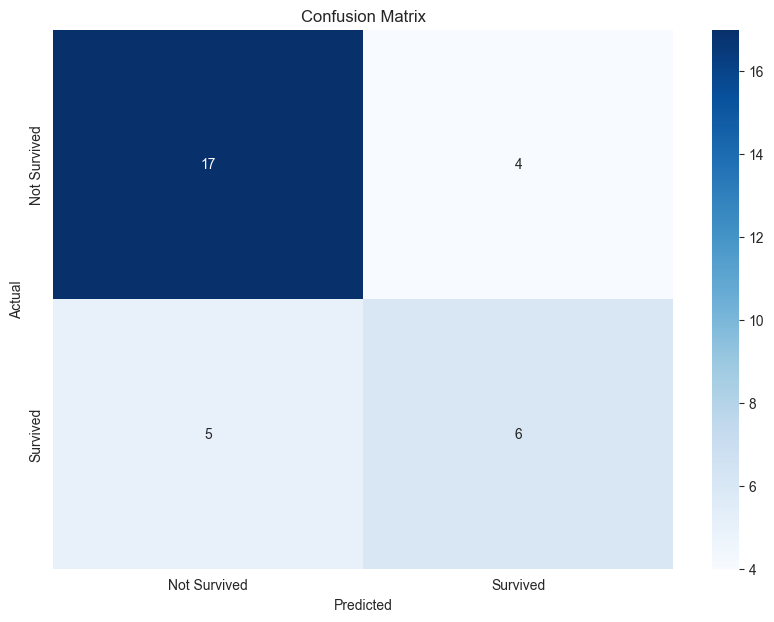

In [121]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve

In [122]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

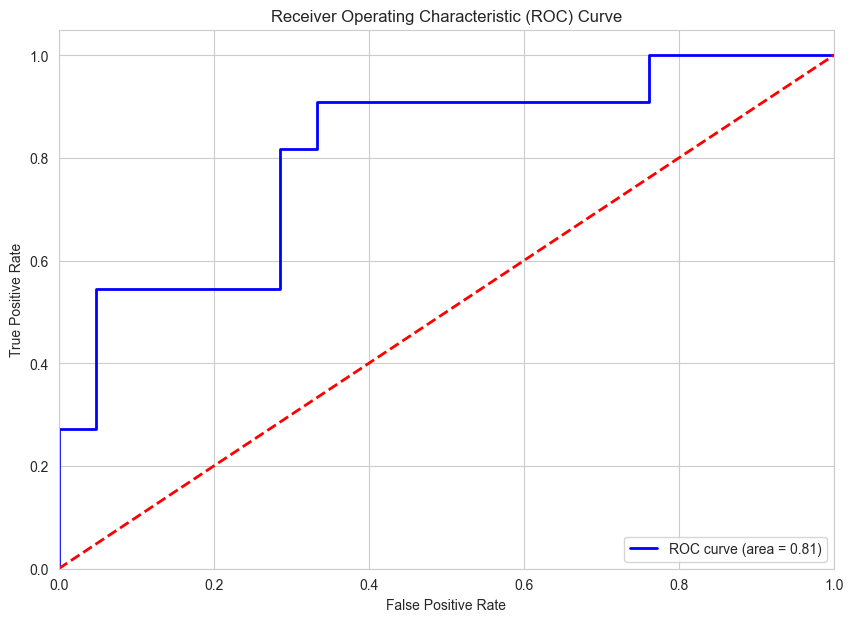

In [123]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance

In [124]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

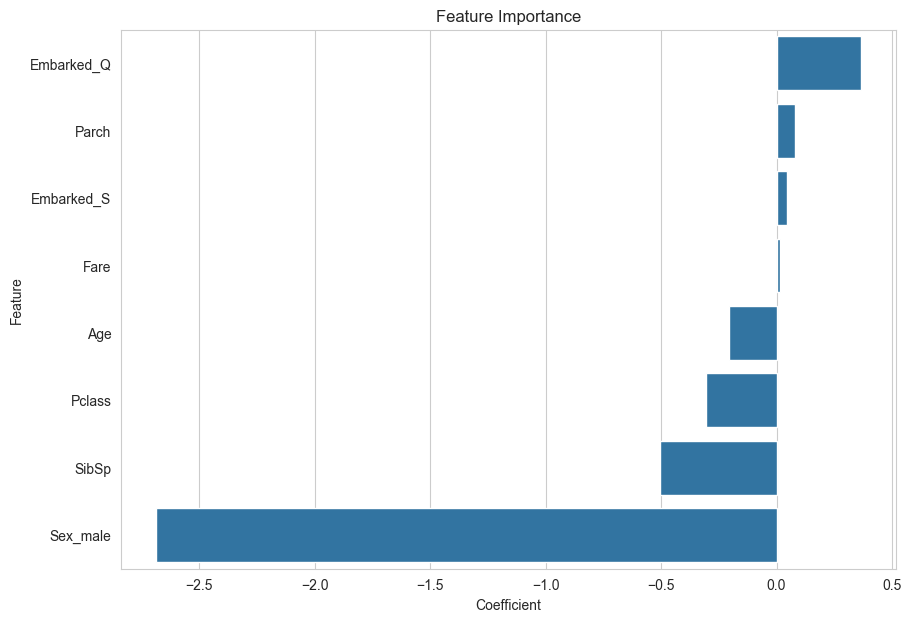

In [125]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()